# Courtney's SSP Guide Notebook Sem 2 2023

We're looking at target A0620-00 for this project

In [1]:
## import section, the first three are packages that I use in every code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## this package is used to open and read fits files, you'll need to install astropy for it
from astropy.io import fits
## this package helps with dealing with your file structures
import os

In [2]:
## optional - these are some parameters I like for my plots.
## you can also turn these into a style file to read in, if you prefer that
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 17
plt.rcParams['axes.labelsize'] = 20

In [3]:
## "magic" command for setting the jupyter backend
## allows you to have plots show inline in notebooks
%matplotlib inline

## Lets look at a single example spectrum

In [4]:
## reading in an example fits file
## "../" indicates the parent directory, aka one folder upwards
spectrum = fits.open('../A0620-00/00Dec24-1n.fits')

In [5]:
## we can look at the structure of this fits file
## note that if you were not in a notebook, or if you weren't at the last line of a notebook cell
##   that you'd need to put this inside a print() statement
# print(spectrum.info())
spectrum.info()

Filename: ../A0620-00/00Dec24-1n.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (546,)   float32   


This fits file has only one data extension, that's nice. Some may have multiple extensions! That's the "flexible" part of the FITS format

In [6]:
## we can also look at the header for this 
## [0] indicates that we're looking at the first extension of the file 
## in this case that's the only extension
spectrum[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                  546 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '12:14:21 (05/11/2004)' / Time of last modification                   
OBJECT  = 'A0620-00'           / Name of the object observed                    
CRVAL1  =  6.2500000000000E+03 / Wavelength                                     
CDELT1  =      1.1093247588424 /                                                
CRPIX1  =         1.000000E+00 /                                                
CTYPE1  = 'LINEAR  '           /                                                
DATE    = '2004-11-05T00:14:

In [7]:
## We can access any one of these values by calling its name
spectrum[0].header['JD']

2451902.9671979

In [8]:
## the data itself is stored in the .data portion of the spectrum object as an array
# spectrum[0].data

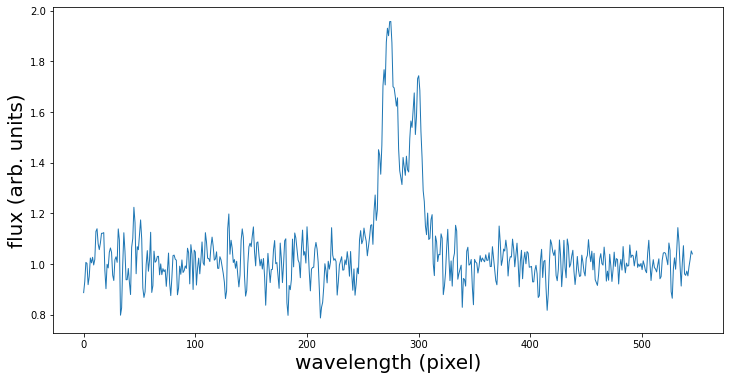

In [9]:
## we can plot this spectrum in pixel coordinates using matplotlib

plt.figure(figsize=(12,6))
## plot will use the index as the x-axis if you don't give it 2 arguments
plt.plot(spectrum[0].data)
plt.xlabel('wavelength (pixel)')
plt.ylabel('flux (arb. units)')
plt.show()

In [10]:
## to calculate the wavelength array, we need some data from the fits header
## note this is just ONE WAY to do this, and may very well not be the "best" :)
## This is just the way that makes the most sense to me.

## start by creating an array full of zeros with the length of the number of pixels
wavelength = np.zeros(spectrum[0].header['NAXIS1'])
## now initialize the first point
wavelength[0] = spectrum[0].header['CRVAL1']
## now loop over the array to initialize each point
for i in range(1,spectrum[0].header['NAXIS1']):
    wavelength[i] = wavelength[i-1] + spectrum[0].header['CDELT1']
    
## lets print it out just to make sure the numbers are reasonable
# wavelength

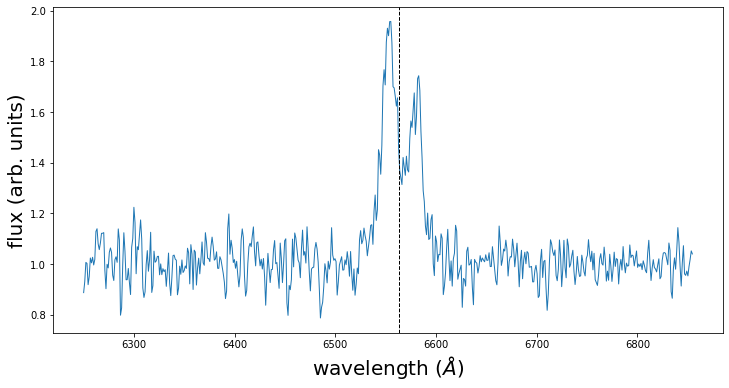

In [11]:
## now lets use that array to plot our data
## I'll also plot at line at H alpha just to confirm that everything is looking right!

plt.figure(figsize=(12,6))
plt.plot(wavelength,spectrum[0].data)
plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)') # this uses latex formatting for special characters
plt.ylabel('flux (arb. units)')
plt.show()

## Now lets look at every spectrum taken in the 2006 run

In [12]:
## I'm going to define a couple of functions to make my life easier

def generate_wavelength_arr(spectrum_object):
    ## note that any variables defined inside a function don't communicate outside of the function
    ## it's still good practice to not reuse variable names
    wavelength_arr = np.zeros(spectrum_object[0].header['NAXIS1'])
    wavelength_arr[0] = spectrum_object[0].header['CRVAL1']
    try:
        for i in range(1,spectrum_object[0].header['NAXIS1']):
            wavelength_arr[i] = wavelength_arr[i-1] + spectrum_object[0].header['CDELT1']
    except KeyError:
        for i in range(1,spectrum_object[0].header['NAXIS1']):
            wavelength_arr[i] = wavelength_arr[i-1] + spectrum_object[0].header['CD1_1']
    return wavelength_arr

def plot_halpha_profile(spectrum_object,wavelength_arr):
    plt.figure(figsize=(12,6))
    ## note I had to edit this upon using the 2006 spectra :)
    ## to access the data we now need the [0][0] at the end of it
    plt.plot(wavelength_arr,spectrum_object[0].data[0][0])
    plt.axvline(6563,color='k',linestyle='--')
    plt.xlabel(r'wavelength ($\AA$)')
    plt.ylabel('flux (arb. units)')
    plt.show()

In [13]:
## now I can create a numpy array of all the files in the spectrum folder
## this is where importing os comes in :)
all_spectra_list = np.asarray(os.listdir('../A0620-00/'))

In [14]:
## I will only take those files where the first two characters are 06
mask = []
for i in range(0,len(all_spectra_list)):
    if all_spectra_list[i][:2] == '06':
        mask.append(True)
    else:
        mask.append(False)
spectra_2006_list = all_spectra_list[mask]
spectra_2006_list.sort()
spectra_2006_list

array(['06Dec21-1n.fits', '06Dec21-2n.fits', '06Dec21-3n.fits',
       '06Dec21-4n.fits', '06Dec21-5n.fits', '06Dec21-6n.fits',
       '06Dec21-7n.fits', '06Dec21-8n.fits', '06Dec21-9n.fits',
       '06Dec22-1n.fits', '06Dec22-2n.fits', '06Dec25-1n.fits',
       '06Dec25-2n.fits', '06Dec25-3n.fits', '06Dec26-10n.fits',
       '06Dec26-11n.fits', '06Dec26-1n.fits', '06Dec26-2n.fits',
       '06Dec26-3n.fits', '06Dec26-4n.fits', '06Dec26-5n.fits',
       '06Dec26-6n.fits', '06Dec26-7n.fits', '06Dec26-8n.fits',
       '06Dec26-9n.fits', '06Dec27-10n.fits', '06Dec27-11n.fits',
       '06Dec27-12n.fits', '06Dec27-13n.fits', '06Dec27-1n.fits',
       '06Dec27-2n.fits', '06Dec27-3n.fits', '06Dec27-4n.fits',
       '06Dec27-5n.fits', '06Dec27-6n.fits', '06Dec27-7n.fits',
       '06Dec27-8n.fits', '06Dec27-9n.fits', '06Dec28-1n.fits',
       '06Dec28-2n.fits', '06Dec28-3n.fits', '06Dec28-4n.fits',
       '06Dec28-5n.fits', '06Dec28-6n.fits', '06Dec31-1n.fits',
       '06Dec31-2n.fits', '06Dec31

06Dec21-1n.fits


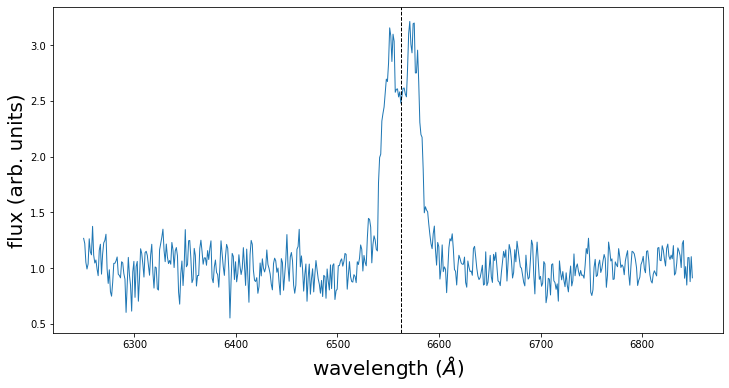

06Dec21-2n.fits


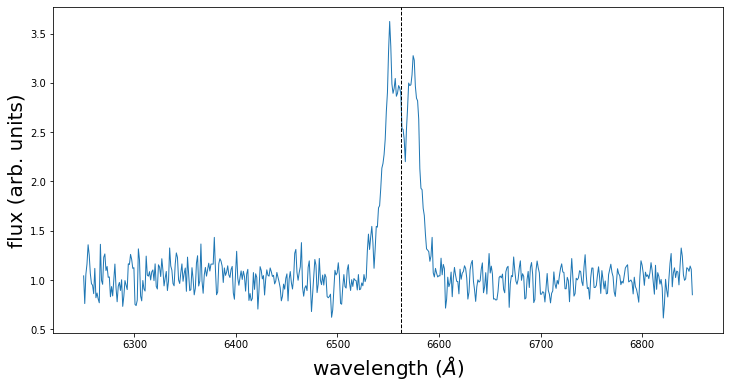

06Dec21-3n.fits


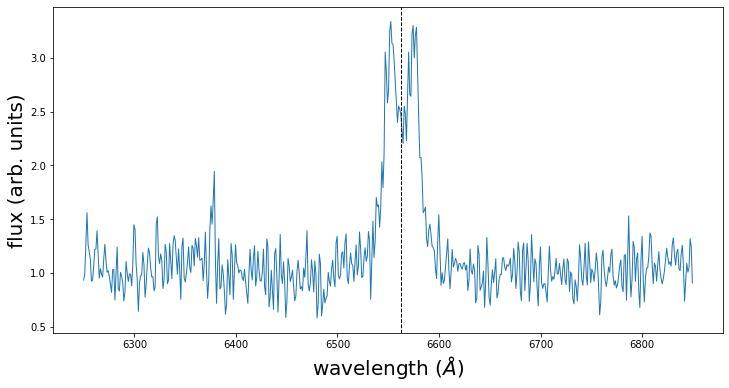

06Dec21-4n.fits


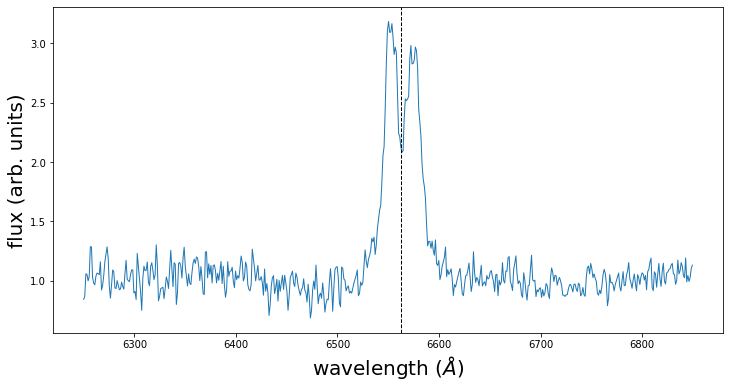

06Dec21-5n.fits


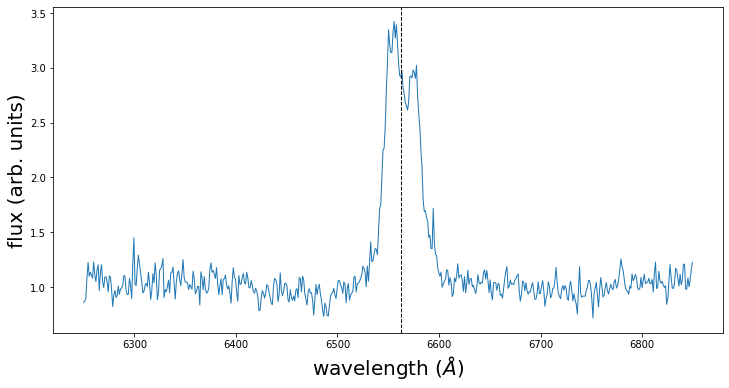

06Dec21-6n.fits


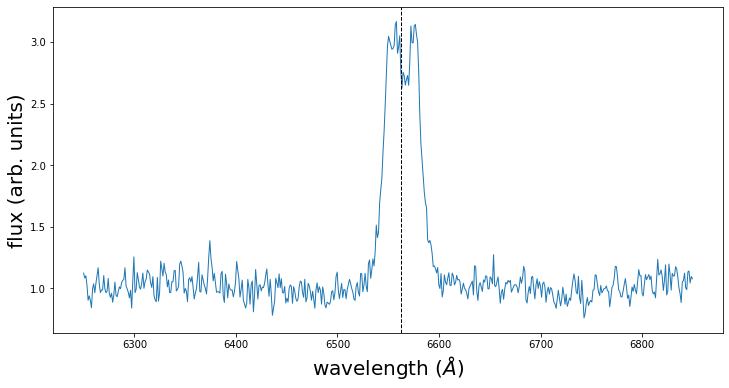

06Dec21-7n.fits


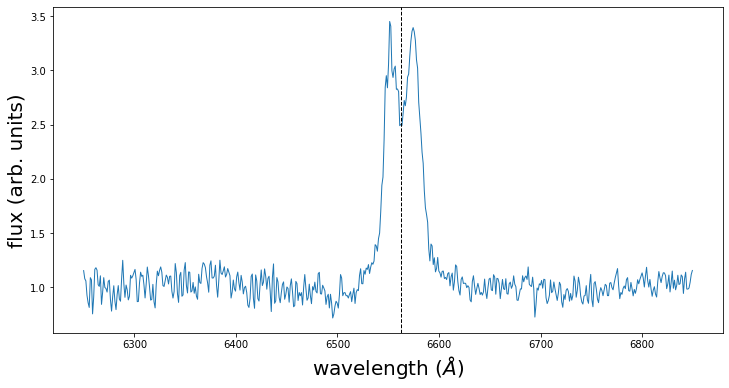

06Dec21-8n.fits


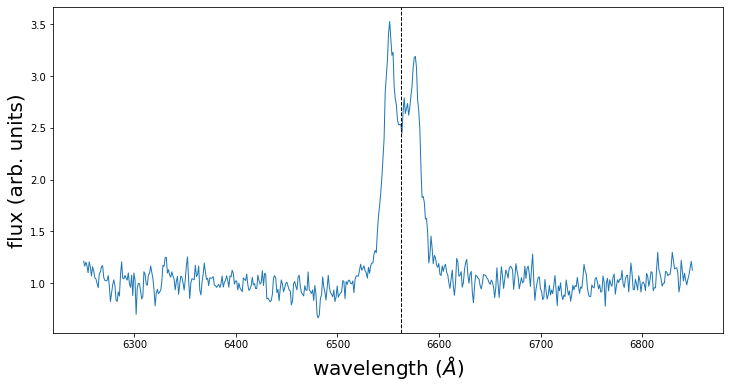

06Dec21-9n.fits


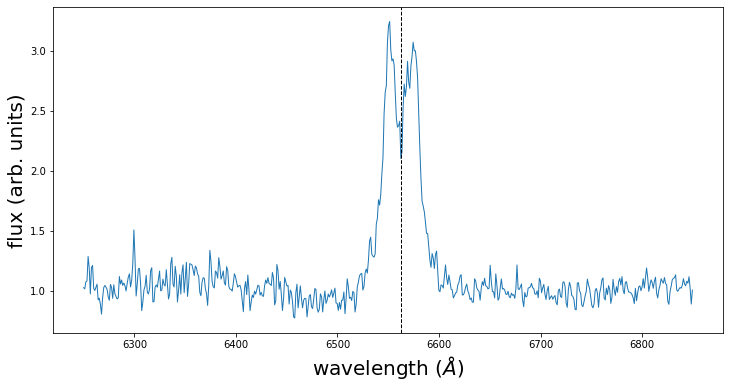

06Dec22-1n.fits


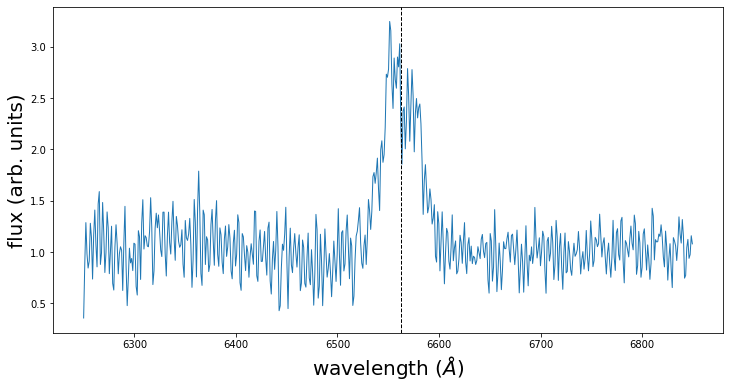

06Dec22-2n.fits


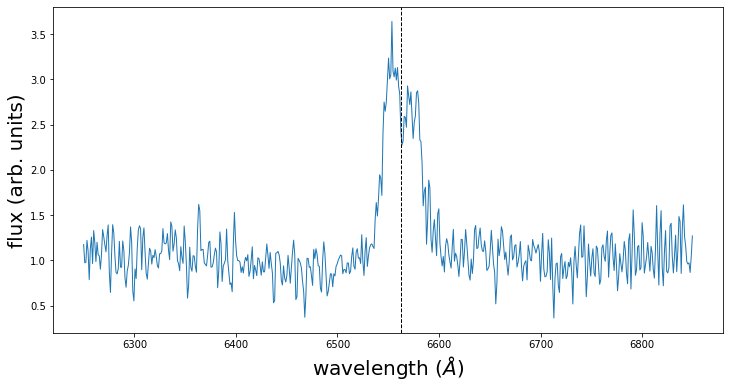

06Dec25-1n.fits


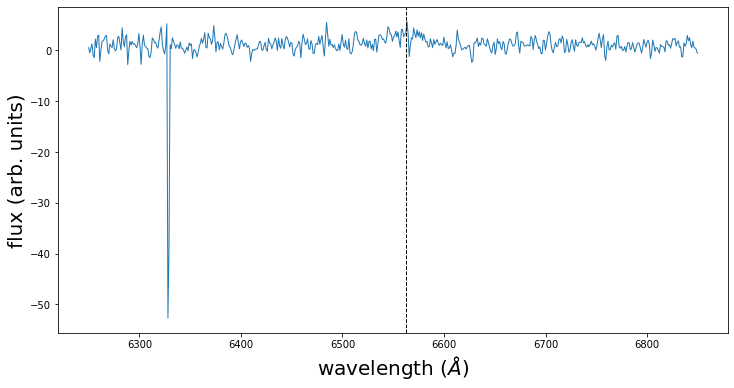

06Dec25-2n.fits


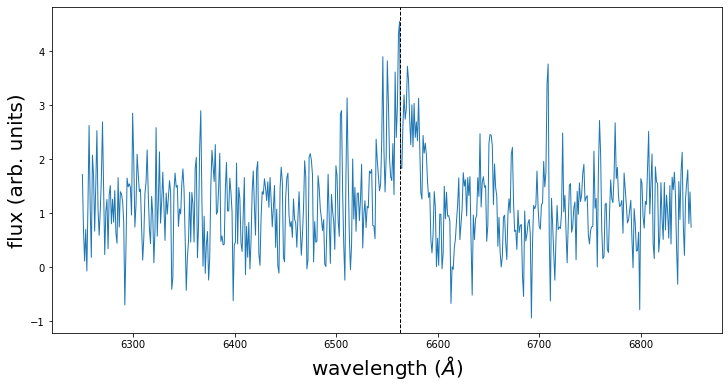

06Dec25-3n.fits


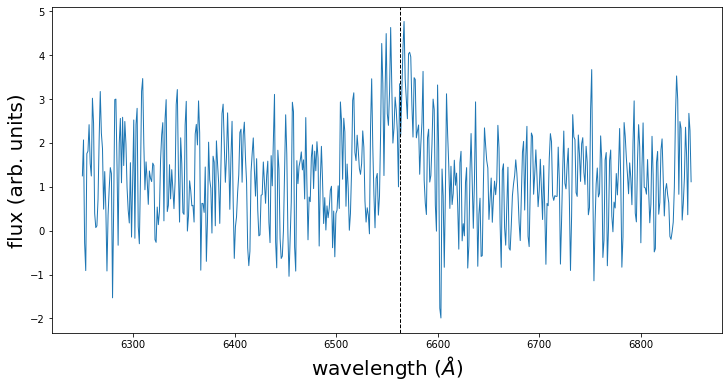

06Dec26-10n.fits


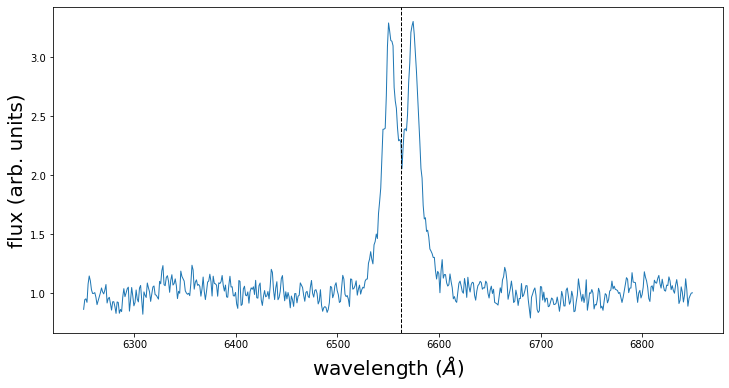

06Dec26-11n.fits


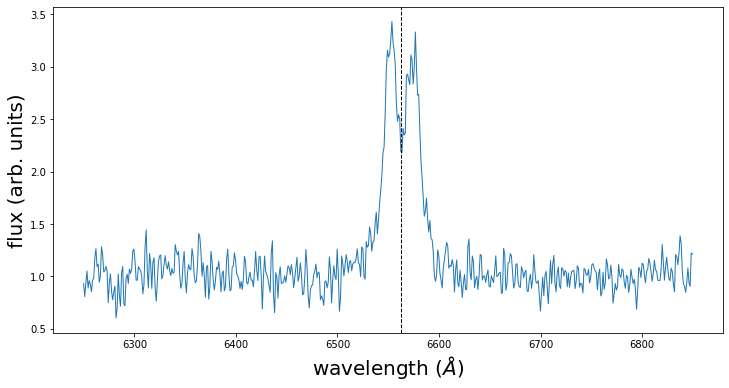

06Dec26-1n.fits


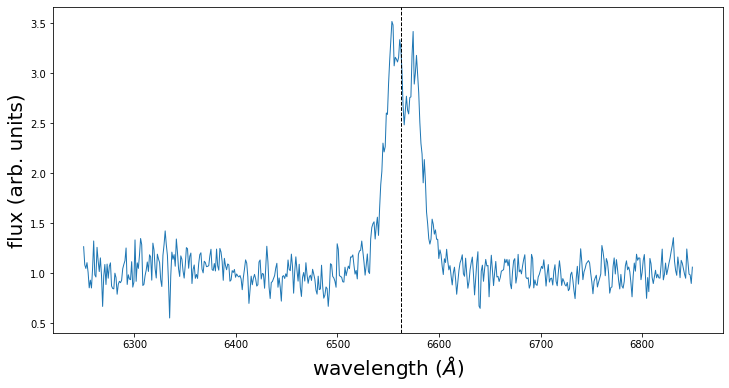

06Dec26-2n.fits


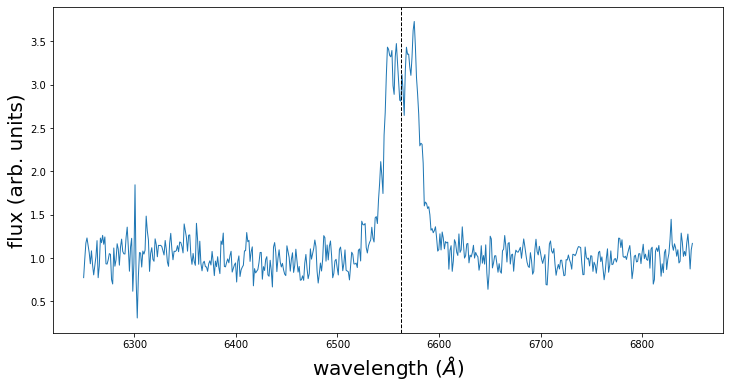

06Dec26-3n.fits


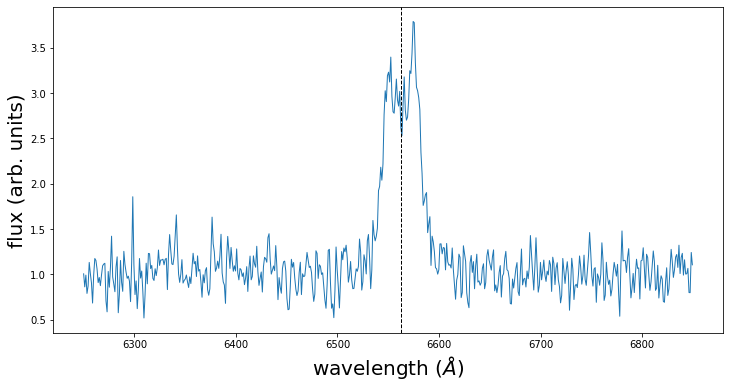

06Dec26-4n.fits


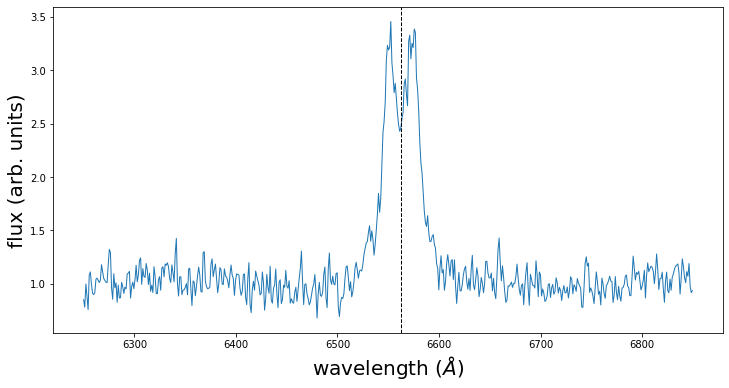

06Dec26-5n.fits


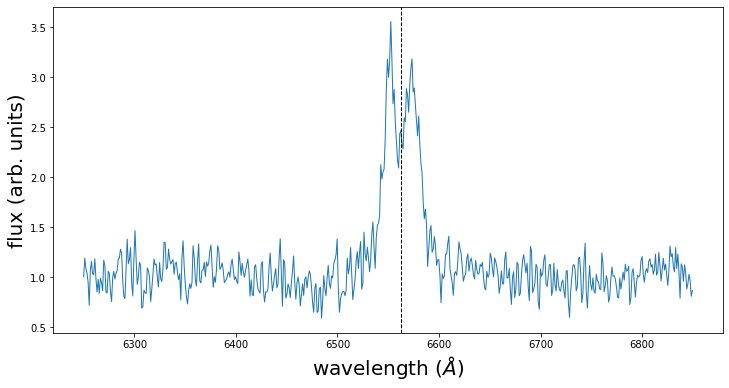

06Dec26-6n.fits


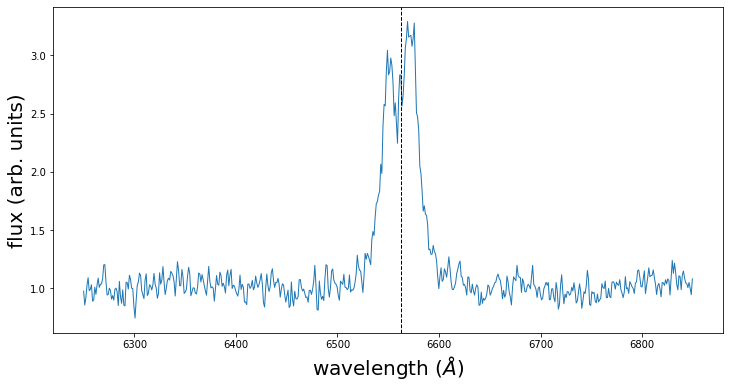

06Dec26-7n.fits


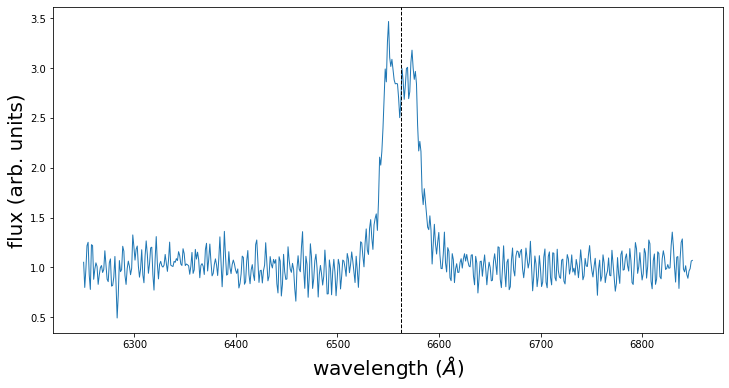

06Dec26-8n.fits


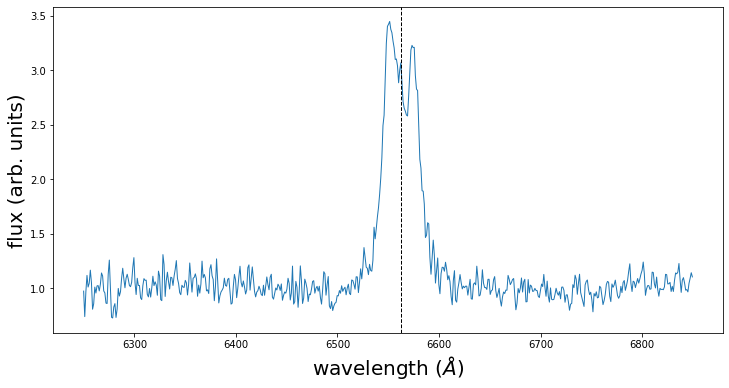

06Dec26-9n.fits


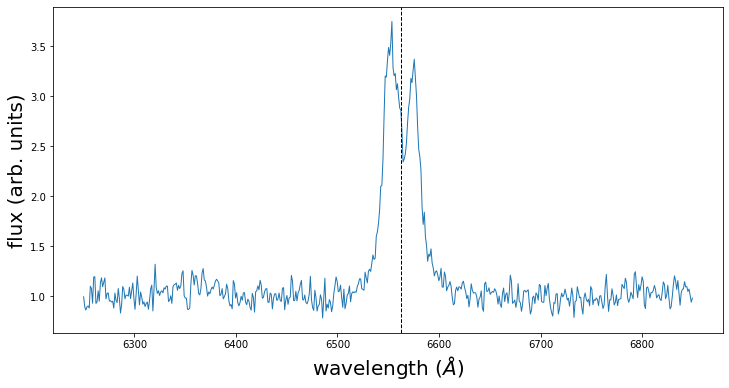

06Dec27-10n.fits


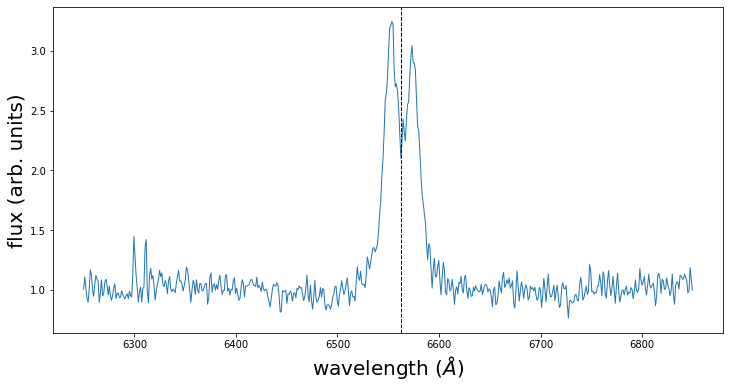

06Dec27-11n.fits


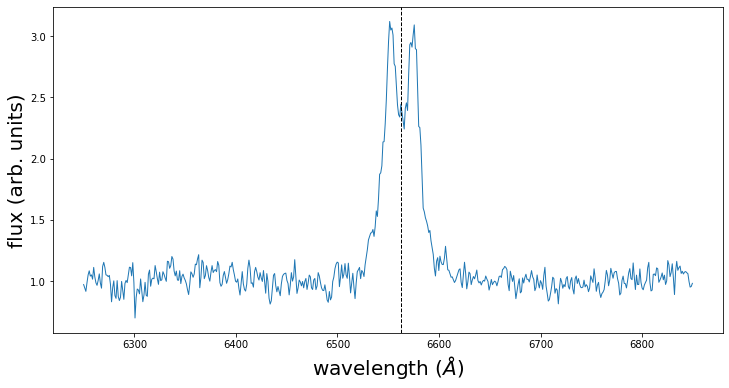

06Dec27-12n.fits


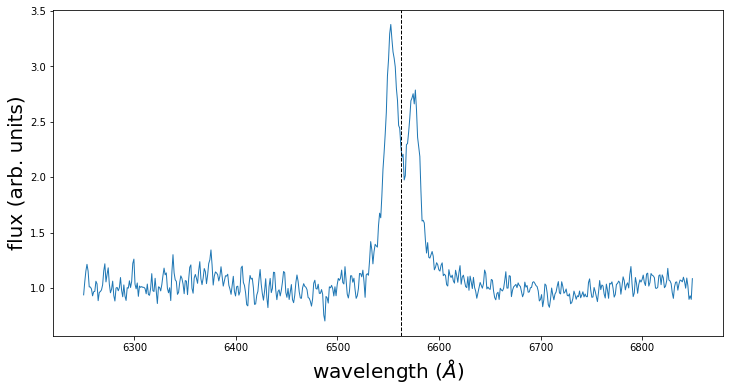

06Dec27-13n.fits


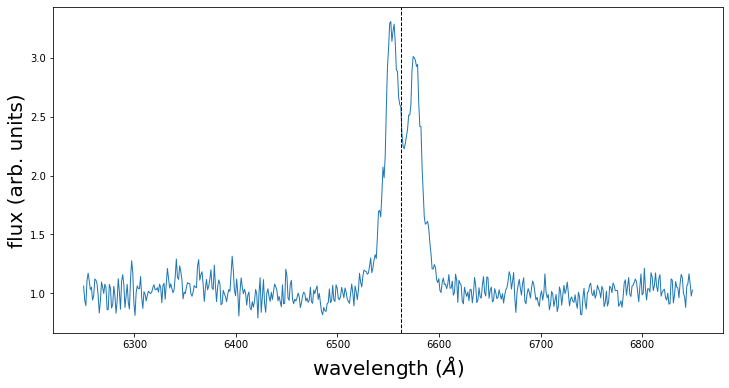

06Dec27-1n.fits


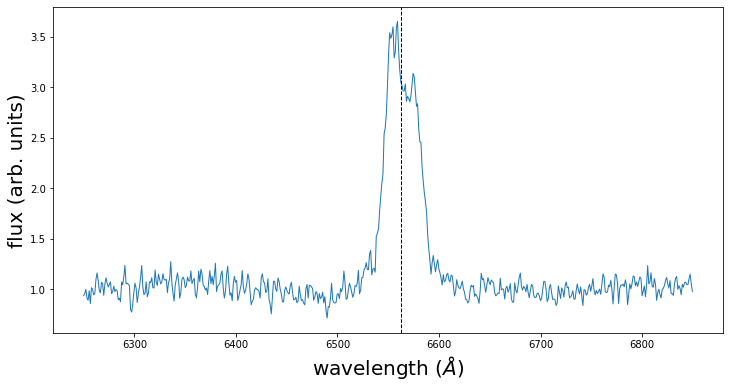

06Dec27-2n.fits


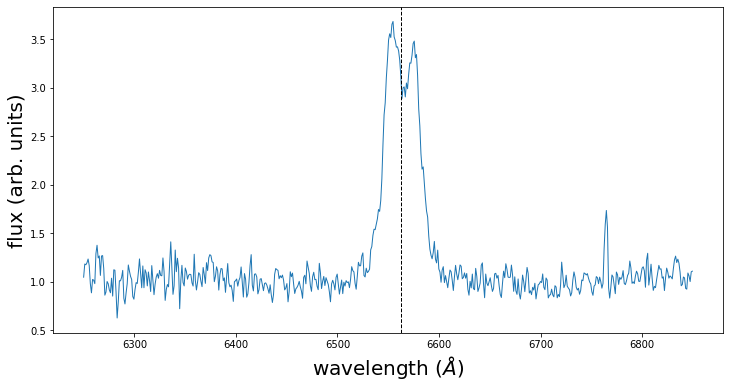

06Dec27-3n.fits


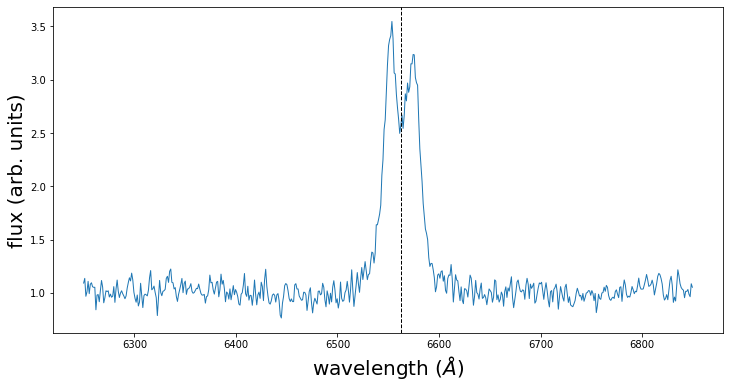

06Dec27-4n.fits


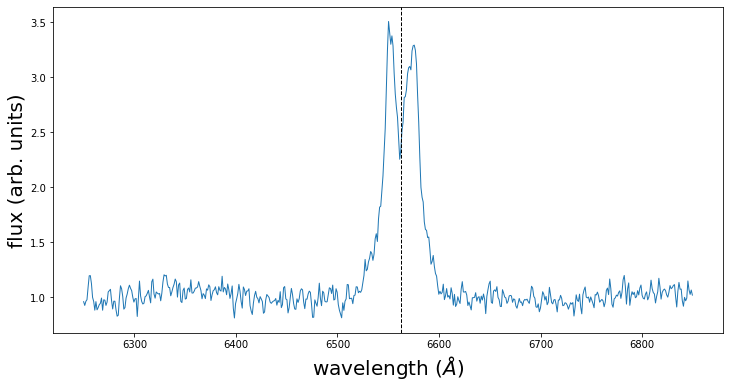

06Dec27-5n.fits


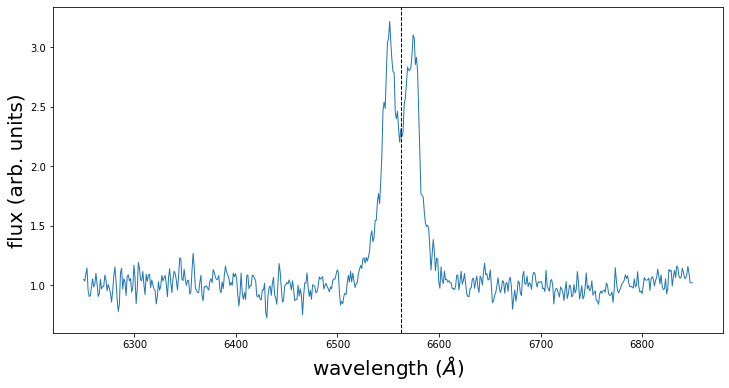

06Dec27-6n.fits


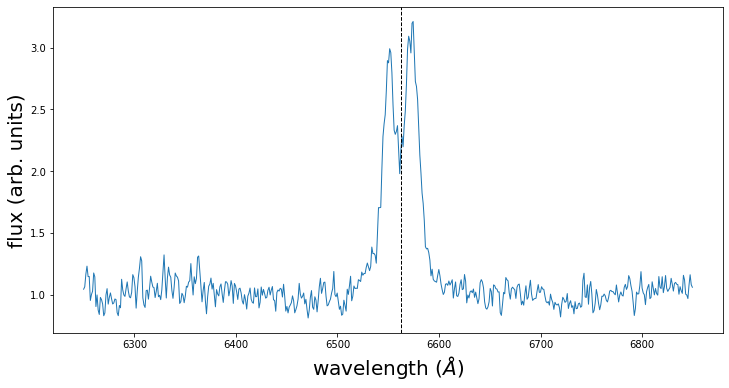

06Dec27-7n.fits


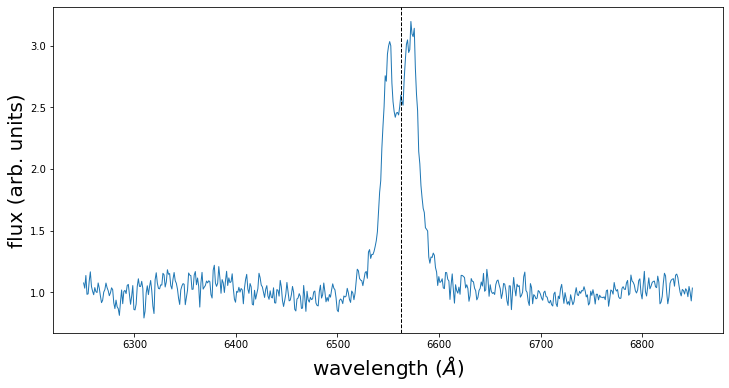

06Dec27-8n.fits


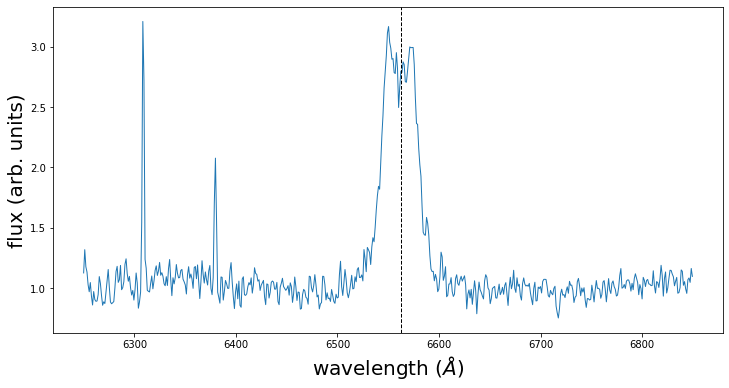

06Dec27-9n.fits


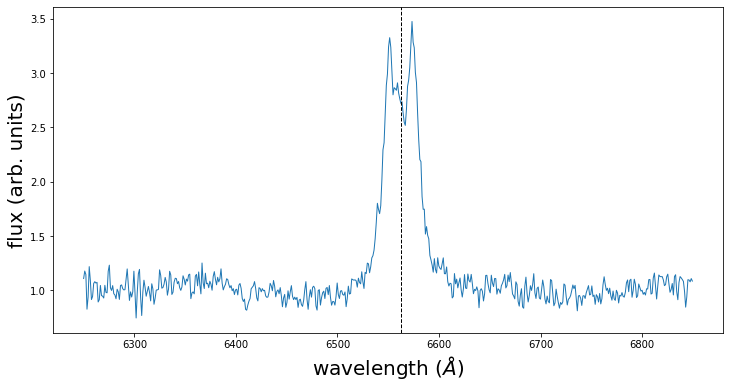

06Dec28-1n.fits


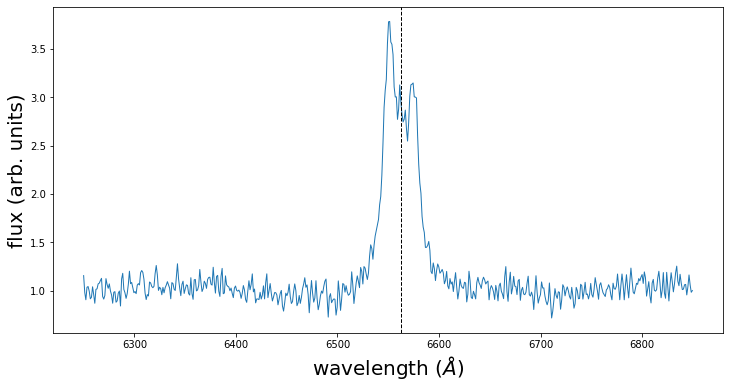

06Dec28-2n.fits


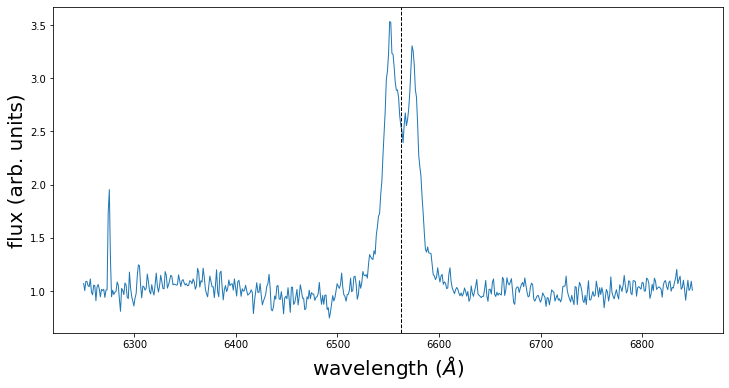

06Dec28-3n.fits


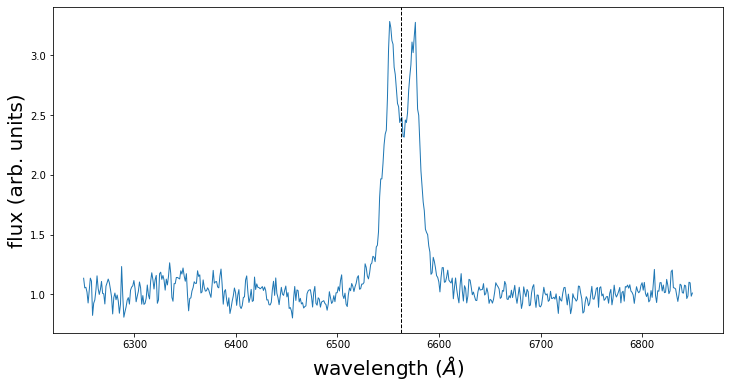

06Dec28-4n.fits


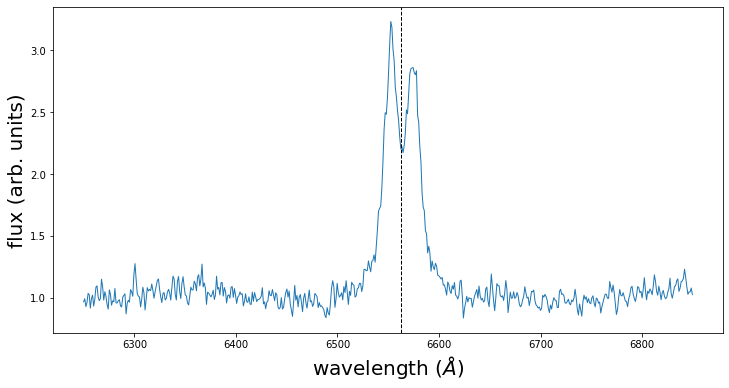

06Dec28-5n.fits


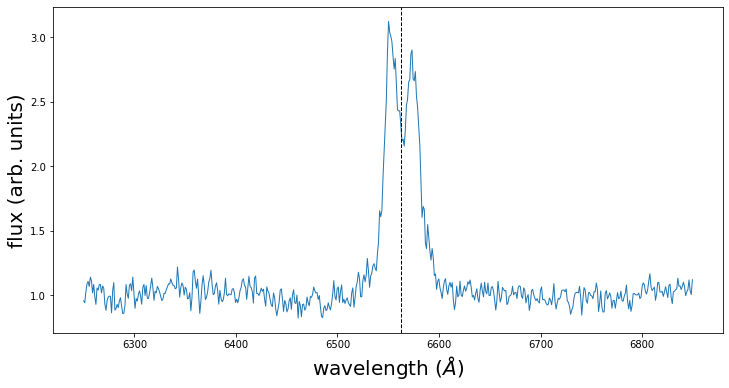

06Dec28-6n.fits


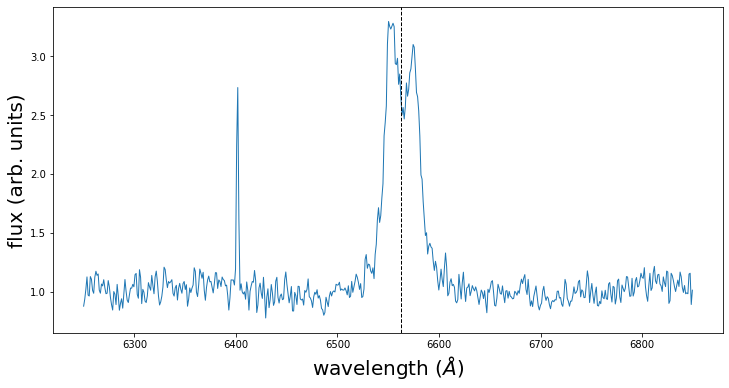

06Dec31-1n.fits


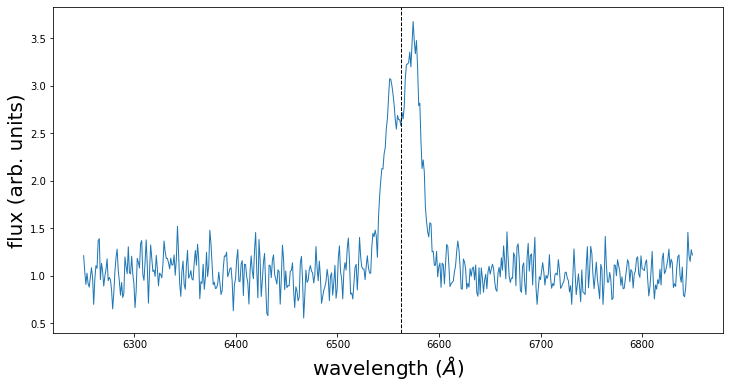

06Dec31-2n.fits


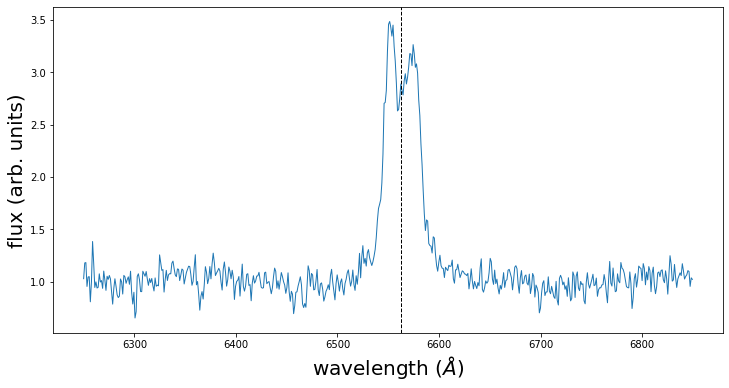

06Dec31-3n.fits


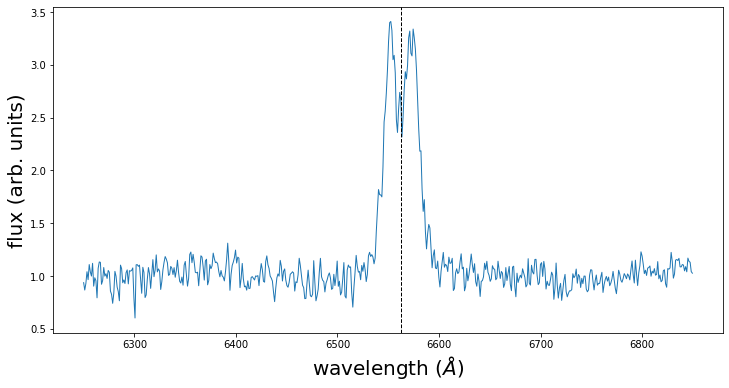

06Dec31-4n.fits


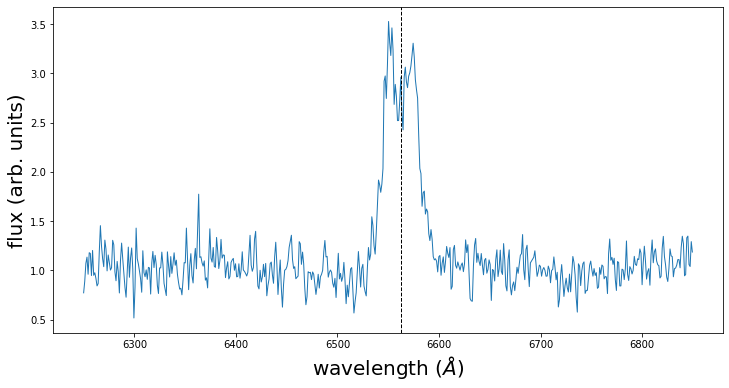

In [15]:
## lets loop over all these files and plot a spectrum for each one
## I am immediately not following my own advice re: reusing variable names
for file_name in spectra_2006_list:
    print(file_name)
    spectrum = fits.open('../A0620-00/'+file_name)
    wavelength = generate_wavelength_arr(spectrum)
    plot_halpha_profile(spectrum,wavelength)

:) lots of spectra

### Side challenge that you could try:

How would you go about plotting all of these on one plot?

## What phase are these spectra taken at?

In [16]:
# phase = ((hdr[‘JD’] - 2454084.77560)/0.32301406)%1
# T0(n) = JD 2,454,084.77560 − (24773 − n) × 0.32301406.

for file_name in spectra_2006_list:
    spectrum = fits.open('../A0620-00/'+file_name)
    print(file_name, spectrum[0].header['HJD'])
    phase = ((spectrum[0].header['HJD'] - 2454084.77560)/0.32301406)#%0.32301406
    print(phase)
    print('-------------------')

06Dec21-1n.fits 2454090.98714105
19.22994017695
-------------------
06Dec21-2n.fits 2454091.01072579
19.302954770297426
-------------------
06Dec21-3n.fits 2454091.05939528
19.45362774729384
-------------------
06Dec21-4n.fits 2454091.08064666
19.519418629517084
-------------------
06Dec21-5n.fits 2454091.11625003
19.629640983466107
-------------------
06Dec21-6n.fits 2454091.13734631
19.694951700419548
-------------------
06Dec21-7n.fits 2454091.15857107
19.76066017139063
-------------------
06Dec21-8n.fits 2454091.18212224
19.83357083596937
-------------------
06Dec21-9n.fits 2454091.2031155
19.89856262054081
-------------------
06Dec22-1n.fits 2454092.07080311
22.58478504063615
-------------------
06Dec22-2n.fits 2454092.09585194
22.66233222257856
-------------------
06Dec25-1n.fits 2454094.97096874
31.563235173855823
-------------------
06Dec25-2n.fits 2454095.14549373
32.10353670101047
-------------------
06Dec25-3n.fits 2454095.16980517
32.17880104109989
-------------------
06Dec

## Adding the spectra together

In [17]:
## Lets first check if the wavelength arrays are all the same before we try just adding these the easy way
for file_name in spectra_2006_list:
    print(file_name)
    spectrum = fits.open('../A0620-00/'+file_name)
    wavelength = generate_wavelength_arr(spectrum)
    print(wavelength[0:10])
    print(len(wavelength))

06Dec21-1n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-2n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-3n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-4n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-5n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-6n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-7n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-8n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec21-9n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec22-1n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 6259.9]
546
06Dec22-2n.fits
[6250.  6251.1 6252.2 6253.3 6254.4 6255.5 6256.6 6257.7 6258.8 

In [18]:
## that looks pretty good!
## so we really only need the one wavelength array

In [19]:
## now lets initialize an empty NUMPY ARRAY and start adding to it
## note that only numpy arrays allow elementwise addition! 
## the length of this array should be the same as the wavelength array
additive_spectrum = np.zeros(len(wavelength))
for file_name in spectra_2006_list:
    spectrum = fits.open('../A0620-00/'+file_name)
    additive_spectrum = additive_spectrum + spectrum[0].data[0][0]
# additive_spectrum

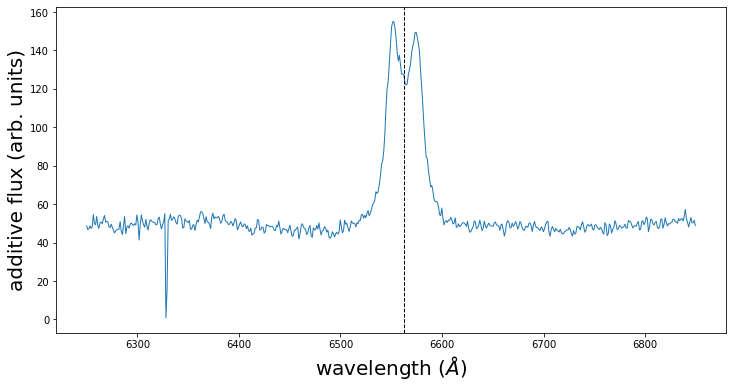

In [20]:
## time to plot this one!
plt.figure(figsize=(12,6))
plt.plot(wavelength,additive_spectrum)
plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('additive flux (arb. units)')
plt.show()

## Fitting a Gaussian to this big spectrum

In [21]:
## We have to tell the code what a gaussian is
def gaussian_function(data,mu,sigma,amplitude):
    exponential = np.exp(-(data-mu)**2/(2*sigma**2))
    return amplitude*exponential

## we also need to tell the fitter that there will be a continuum background
## another way to handle this is to just subtract it out
def spectrum_model(data,mu,sigma,amplitude,continuum):
    return continuum+gaussian_function(data,mu,sigma,amplitude)

In [22]:
## we need another package
from scipy.optimize import curve_fit

In [23]:
## running curve_fit looks like this
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
## the docs are your friend!!!!
popt, pcov = curve_fit(spectrum_model, xdata=wavelength, ydata=additive_spectrum)
print(popt)

[ 1.          1.          1.         55.39033826]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


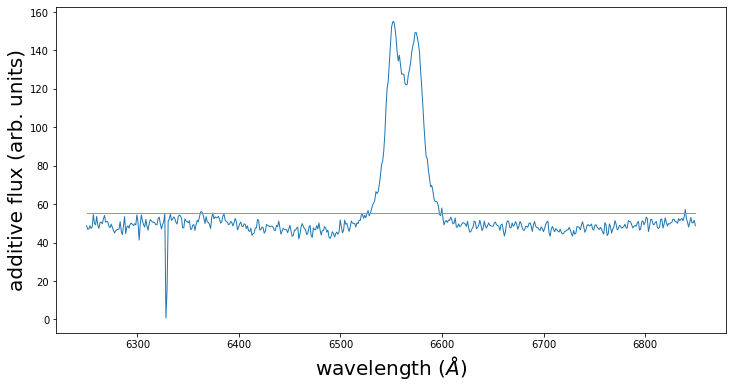

In [24]:
## lets check the fit
plt.figure(figsize=(12,6))
plt.plot(wavelength,additive_spectrum)
plt.plot(wavelength,spectrum_model(wavelength,*popt))
# plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('additive flux (arb. units)')
plt.show()

In [25]:
## its bad!!
## this is because scipy curve_fit is really sensitive to the initial guess that you give it.

In [26]:
## okay now lets try putting in an initial guess for curve_fit and give it some bounds
popt, pcov = curve_fit(spectrum_model, xdata=wavelength, ydata=additive_spectrum,
                       p0=(6563,20,80,50),bounds=([6500,0,0,20],[6600,40,200,80]))
print(popt)

[6563.00925082   16.73983525   99.59607765   48.43212039]


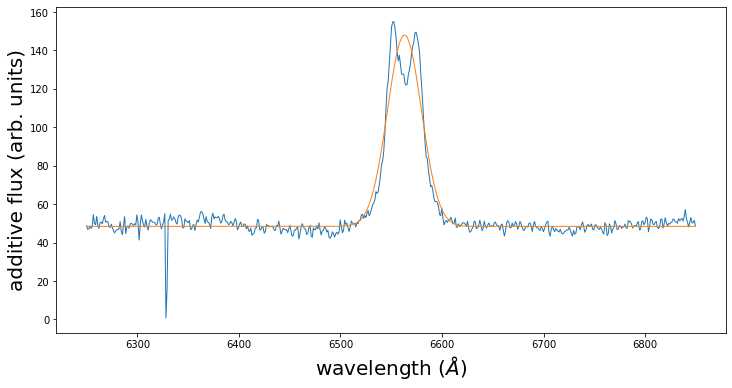

In [27]:
## lets check the fit again
plt.figure(figsize=(12,6))
plt.plot(wavelength,additive_spectrum)
plt.plot(wavelength,spectrum_model(wavelength,*popt))
# plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('additive flux (arb. units)')
plt.show()

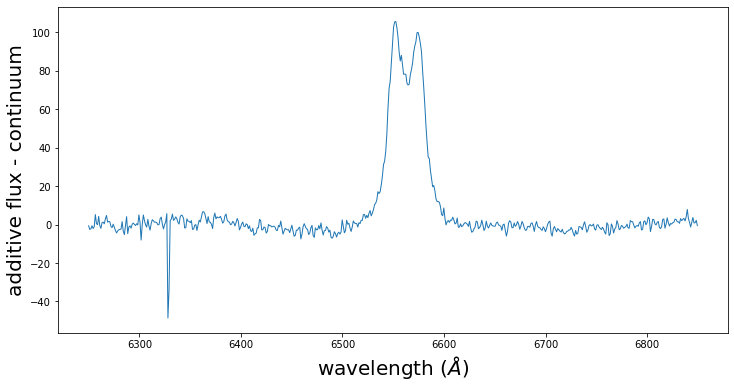

In [28]:
## okay that's better but lets try subtracting the continuum as well!
## this is an okay estimate of the continuum
continuum_estimate = np.median(additive_spectrum)
corrected_additive_spectrum = additive_spectrum-continuum_estimate

## lets plot it to see 
plt.figure(figsize=(12,6))
plt.plot(wavelength,corrected_additive_spectrum)
# plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('additive flux - continuum')
plt.show()

In [29]:
### now lets try fitting just a gaussian to this
popt, pcov = curve_fit(gaussian_function, xdata=wavelength, ydata=corrected_additive_spectrum,
                       p0=(6563,20,100),bounds=([6500,0,0],[6600,np.inf,np.inf]))
print(popt)
# print(pcov)

[6563.00567693   16.55931464   98.80454562]


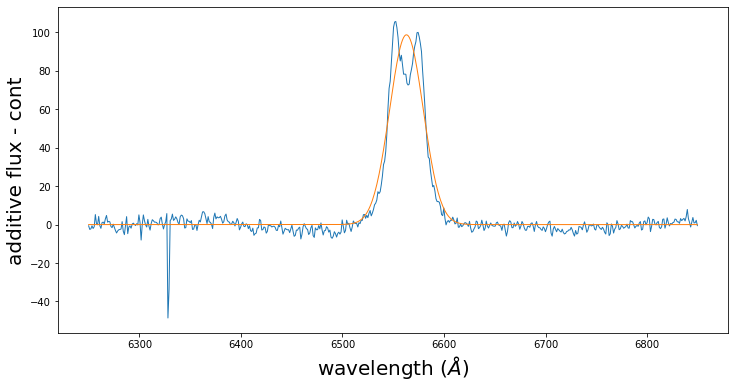

In [30]:
## lets check again
plt.figure(figsize=(12,6))
plt.plot(wavelength,corrected_additive_spectrum)
plt.plot(wavelength,gaussian_function(wavelength,*popt))
# plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('additive flux - cont')
plt.show()

In [31]:
## what about a two gaussian model
def two_gaussian_model(data,mu1,sigma1,amplitude1,mu2,sigma2,amplitude2):
    return gaussian_function(data,mu1,sigma1,amplitude1)+gaussian_function(data,mu2,sigma2,amplitude2)

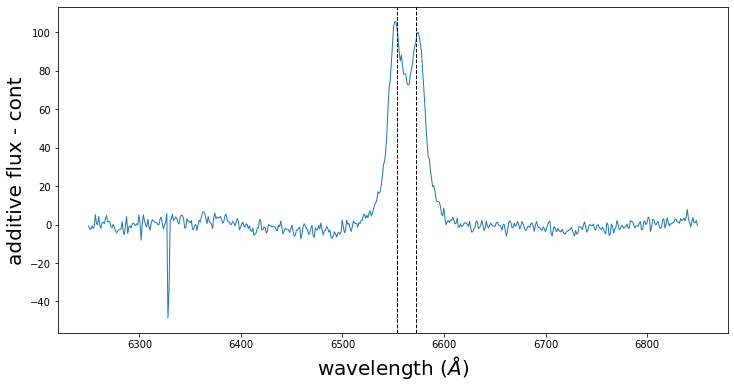

In [39]:
plt.figure(figsize=(12,6))
plt.plot(wavelength,corrected_additive_spectrum)
plt.axvline(6554,color='k',linestyle='--')
plt.axvline(6572,color='k',linestyle='--')
# plt.plot(wavelength,two_gaussian_model(wavelength,*popt))
# plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('additive flux - cont')
plt.show()

In [40]:
# popt, pcov = curve_fit(two_gaussian_model, xdata=wavelength, ydata=corrected_additive_spectrum,
#                        p0=(6563,20,100,6563,20,100),bounds=([6500,0,0,6500,0,0],
#                                                             [6600,np.inf,np.inf,6600,np.inf,np.inf]))
popt, pcov = curve_fit(two_gaussian_model, xdata=wavelength, ydata=corrected_additive_spectrum,
                       p0=(6554,20,100,6572,20,100),bounds=([6500,0,0,6500,0,0],
                                                            [6600,np.inf,np.inf,6600,np.inf,np.inf]))
print(popt)

[6552.20820627    7.73151603   98.46476964 6574.17133363    8.0744061
   94.68842999]


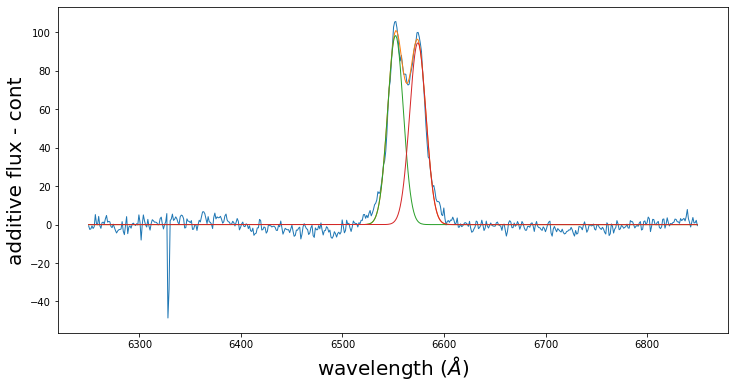

In [43]:
## Check that one
plt.figure(figsize=(12,6))
plt.plot(wavelength,corrected_additive_spectrum)
plt.plot(wavelength,two_gaussian_model(wavelength,*popt))
plt.plot(wavelength,gaussian_function(wavelength,*popt[:3]))
plt.plot(wavelength,gaussian_function(wavelength,*popt[3:]))
# plt.axvline(6563,color='k',linestyle='--')
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('additive flux - cont')
plt.show()